Stock Market Prediction And Forecasting Using Stacked LSTM

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [3]:
data=pd.read_csv('NSE-TATAGLOBAL.csv')
data.shape

(2035, 8)

In [4]:
data.sort_values(by='Date',inplace=True)

In [5]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [6]:
hig=data.Close
hig.head()

2034    121.55
2033    120.90
2032    120.65
2031    117.60
2030    118.65
Name: Close, dtype: float64

IMPORTANT STEP

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
hig=scaler.fit_transform(np.array(hig).reshape(-1,1))
# hig

Train And Test

In [8]:
train_size=int(len(hig)*0.7)
test_size=len(hig) - train_size

train_data , test_data = hig[ 0 : train_size,: ] , hig[ train_size : len(hig),:1 ]

Data Preprossesing

In [9]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [10]:
time_step=100
x_train , y_train =create_dataset(train_data,time_step)
x_test , y_test = create_dataset(test_data,time_step)

In [11]:
print(x_train.shape , y_train.shape)

(1323, 100) (1323,)


In [12]:
print(x_test.shape , y_test.shape)

(510, 100) (510,)


Creating LSTM

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [14]:
x_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [15]:
mdl=Sequential()
mdl.add(LSTM(50,return_sequences=True , input_shape=(100,1)))
mdl.add(LSTM(50,return_sequences=True))
mdl.add(LSTM(50))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error')

In [16]:
mdl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
mdl.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100 , batch_size=64)

Epoch 1/100
21/21 [==============================] - 24s 573ms/step - loss: 0.0071 - val_loss: 0.0043
Epoch 2/100
21/21 [==============================] - 9s 454ms/step - loss: 0.0023 - val_loss: 0.0323
Epoch 3/100
21/21 [==============================] - 9s 431ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 4/100
21/21 [==============================] - 8s 365ms/step - loss: 0.0018 - val_loss: 0.0043
Epoch 5/100
21/21 [==============================] - 9s 455ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 6/100
21/21 [==============================] - 10s 465ms/step - loss: 0.0013 - val_loss: 0.0061
Epoch 7/100
21/21 [==============================] - 8s 384ms/step - loss: 0.0012 - val_loss: 0.0033
Epoch 8/100
21/21 [==============================] - 10s 474ms/step - loss: 0.0011 - val_loss: 0.0199
Epoch 9/100
21/21 [==============================] - 11s 535ms/step - loss: 0.0012 - val_loss: 0.0044
Epoch 10/100
21/21 [==============================] - 10s 488ms/step - loss: 9.2264e-04

In [18]:
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

In [19]:
train_predict=mdl.predict(x_train)
test_predict=mdl.predict(x_test)

16/16 [==============================] - 1s 82ms/step


In [20]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [21]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

135.43955989939036
194.61821952227774


In [22]:
look_back=100
trainPredictPlot = np.empty_like(hig)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(hig)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(hig)-1, :] = test_predict

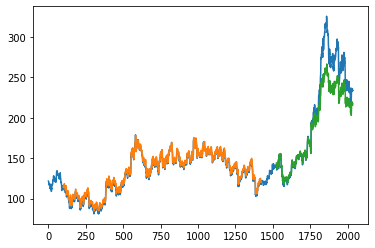

In [23]:
plt.plot(scaler.inverse_transform(hig))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [24]:
len(test_data)

611

In [25]:
x_input=test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [26]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [27]:
len(temp_input)

100

In [28]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = mdl.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = mdl.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.5520168]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

In [29]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [30]:
len(hig)

2035

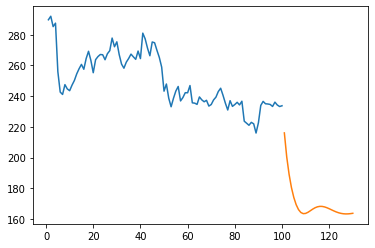

In [31]:
plt.plot(day_new,scaler.inverse_transform(hig[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

<function matplotlib.pyplot.show(close=None, block=None)>

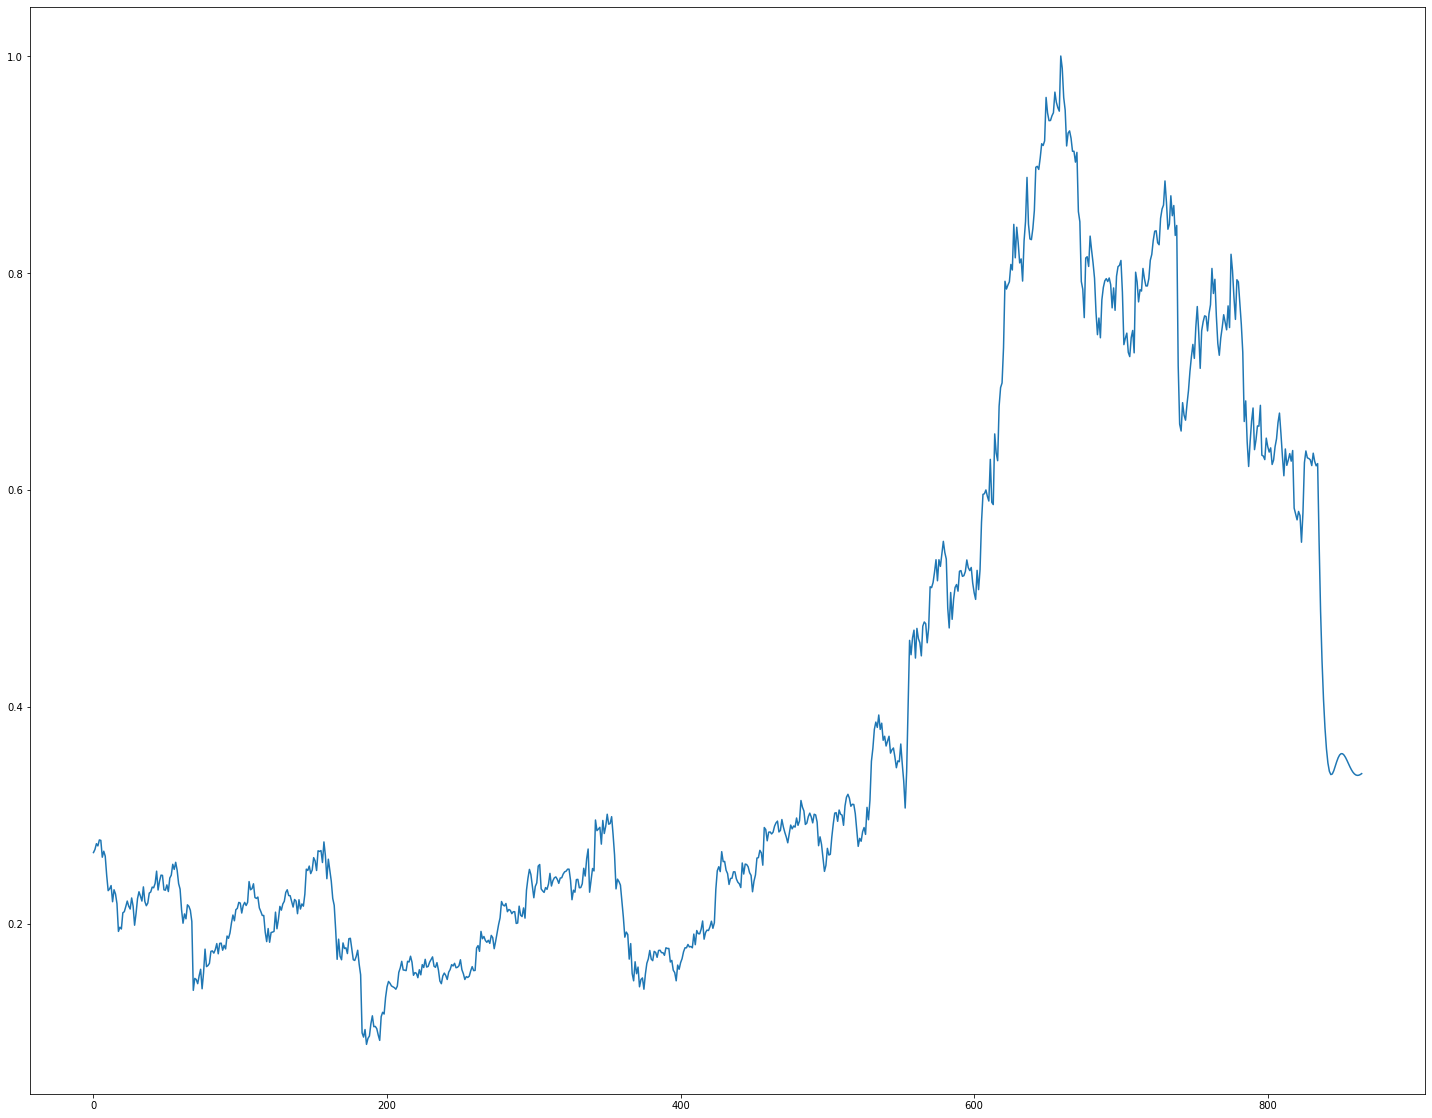

In [32]:
main_output=hig.tolist()
main_output.extend(lst_output)
plt.figure(figsize=(25, 20))
plt.plot(main_output[1200:])
plt.show

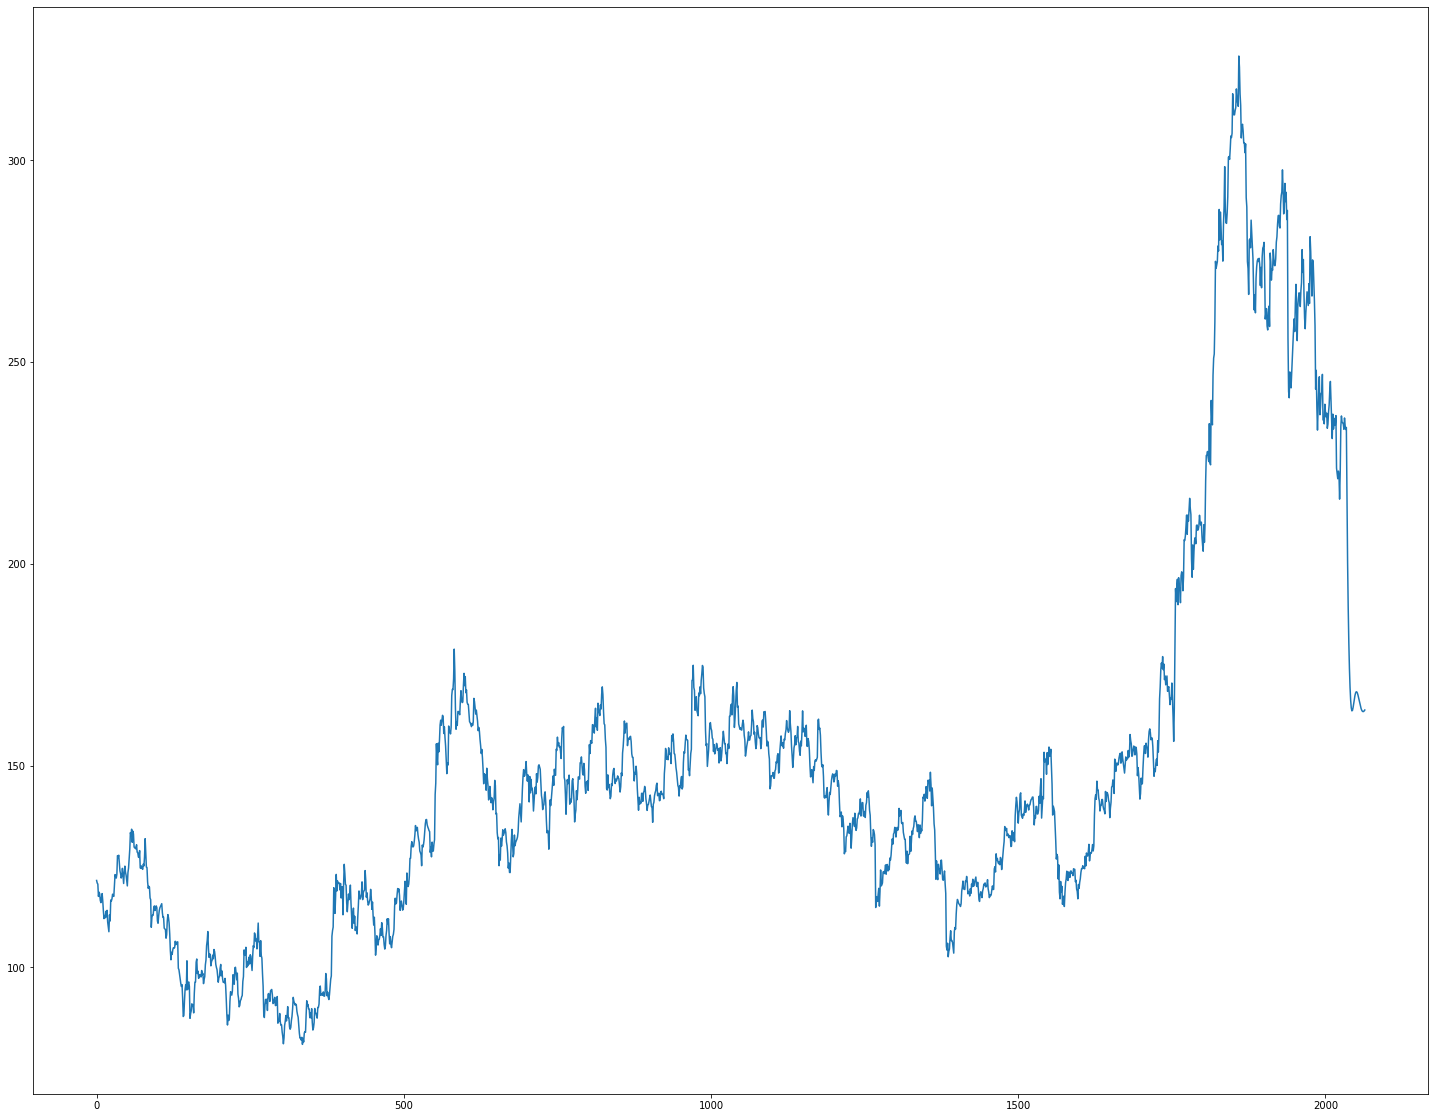

In [33]:
main_output=scaler.inverse_transform(main_output).tolist()
plt.figure(figsize=(25, 20))
plt.plot(main_output)